<a href="https://colab.research.google.com/github/Hienducnguyen1206/Project-III/blob/main/Project_III.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Thêm các thư viện cần thiết và tải bộ dữ liệu mnist

In [ ]:
import tensorflow as tf
import keras
import matplotlib.pyplot as plt;
import numpy as np;
from sklearn.metrics import precision_score, recall_score;



In [ ]:


def load_data():
    (x_train, y_train), (x_test, y_test) = tf.keras.datasets.mnist.load_data()
    x_train = x_train.reshape(-1, 28, 28, 1)
    x_train = x_train / 255.0
    x_test = x_test.reshape(-1, 28, 28, 1)
    x_test = x_test / 255.0
    return x_train, y_train, x_test,y_test;
x_train, y_train,x_test,y_test = load_data()


11490434/11490434 [==============================] - 0s 0us/step


Xây dựng model:
Lớp Sequential có nghĩa là xây dựng một model theo tuần tự, xếp chồng các layers.

In [ ]:
def create_model():
    model = keras.models.Sequential([
        keras.layers.Conv2D(128, (3,3), activation='relu', padding='same', input_shape=(28,28,1)),
        keras.layers.MaxPooling2D(2,2),
        keras.layers.Conv2D(64, (3,3), activation='relu'),
        keras.layers.MaxPooling2D(2,2),
        keras.layers.Flatten(),
        keras.layers.Dense(128, activation='relu'),
        keras.layers.Dense(10, activation='softmax')
    ])
    model.compile(optimizer='rmsprop', loss='sparse_categorical_crossentropy', metrics=['acc'])
    return model

- Lớp conv2D gồm 128 bộ lọc với kích thước 3*3, sử dụng bộ đệm = same để đầu ra của layer không bị thay đổi so với đầu vào. Đầu vào của layer là hình có kích thước 28x28, kênh màu là 1 do ảnh đen trắng.
- Lớp MaxPooling2D lọc các ma trận 2 chiều 2x2 lấy ra điểm ảnh có giá trị lớn nhất.
-Lớp conv2D thứ hai gồm 64 bộ lọc với kích thước 3x3 sử dụng hàm kích hoạt relu nhưng không có padding.
- Lớp MaxPooling2D thứ hai tương tự lọc các ma trận 2 chiều 2x2 lấy ra điểm ảnh có giá trị lớn nhất.
- Lớp Flatten biến đổi dữ liệu từ một ma trận 2 chiều thành vector 1 chiều là đầu vào cho lớp dense.
- Lớp Dense thứ nhất là một layer gồm 128 neuron kết nối theo kiểu fully connected, sử dụng hàm kích hoạt relu.
- Lớp cuối cùng là một layer gồm 10 neuron tương ứng với 10 phân loại của mô hình (0-9), sử dụng hàm kích hoạt softmax để dự đoán đầu ra cho mỗi lớp.

Hàm tối ưu sử dụng là rmsprop và hàm mất mát sparse_categorical_crossentropy cho bài toán phân loại đa nhãn.
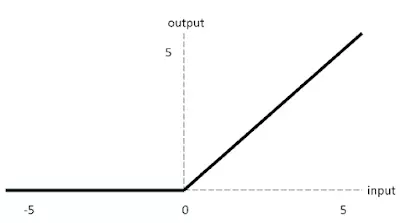  
Hàm Relu

Bắt đầu train model


In [ ]:

model = create_model()
history = model.fit(x_train, y_train, epochs=3,  verbose=1)


Epoch 1/3
1875/1875 [==============================] - 214s 113ms/step - loss: 0.1145 - acc: 0.9636
Epoch 2/3
1875/1875 [==============================] - 198s 106ms/step - loss: 0.0378 - acc: 0.9890
Epoch 3/3
1875/1875 [==============================] - 196s 105ms/step - loss: 0.0272 - acc: 0.9919


In [ ]:
image_to_predict = x_test[8]
image_to_predict = image_to_predict.reshape(1, 28, 28, 1)
image_to_predict = image_to_predict / 255.0
predicted_vector = model.predict(image_to_predict)
print(f'Predicted vector (softmax output): {predicted_vector}')
print(predicted_vector.shape)
y_pred = np.argmax(predicted_vector)
print(y_pred)


1/1 [==============================] - 0s 26ms/step
Predicted vector (softmax output): {predicted_vector}
(1, 10)
1


In [ ]:

test_loss, test_accuracy = model.evaluate(x_test, y_test, verbose=0)
print(f'Test accuracy: {test_accuracy}')
y_pred = np.argmax(model.predict(x_test), axis=1)
precision = precision_score(y_test, y_pred, average='macro')
recall = recall_score(y_test, y_pred, average='macro')
print(f'Test precision: {precision}')
print(f'Test recall: {recall}')


Test accuracy: 0.9861999750137329
313/313 [==============================] - 10s 31ms/step
Test precision: 0.9863150473868039
Test recall: 0.9861733213363969


Các thông số đánh giá:
- Accuracy (Độ chính xác): Đại diện cho tỷ lệ dự đoán đúng trên toàn bộ các trường hợp. Độ chính xác giúp ta đánh giá hiệu quả dự báo của mô hình trên một bộ dữ liệu. Độ chính xác càng cao thì mô hình của chúng ta càng chuẩn xác.

 Accuracy = (TP+TN)/Total example.


- Precision : Precision trả lời cho câu hỏi trong các trường hợp được dự báo là positive thì có bao nhiêu trường hợp là đúng. Precision càng cao thì mô hình càng chính xác.

  Precision = TP/(TP+FP)


- Recall : Recall đo lường tỷ lệ dự báo chính xác các trường hợp dự đoán positive trên toàn bộ các mẫu thuộc nhóm positive.

   Recall= TP/(TP+FN)

- F1 Score: là trung bình điều hòa giữa precision và recall. Do đó nó đại diện hơn trong việc đánh gía độ chính xác trên đồng thời precision và recall

 F1 =  2/(precision^-1 + recall^-1)

In [ ]:
conv_output_shape = model.layers[0].output_shape
print("Kích thước tensor sau lớp Conv2D đầu tiên:", conv_output_shape)
conv_output_shape1 = model.layers[1].output_shape
print("Kích thước tensor sau lớp Maxpooling đầu tiên:", conv_output_shape1)
conv_output_shape2 = model.layers[2].output_shape
print("Kích thước tensor sau lớp Conv2D thứ hai:", conv_output_shape2)
conv_output_shape3 = model.layers[3].output_shape
print("Kích thước tensor sau lớp Maxpooling thứ hai:", conv_output_shape3)
conv_output_shape4 = model.layers[4].output_shape
print("Kích thước tensor sau lớp flatten:", conv_output_shape4)
conv_output_shape5 = model.layers[5].output_shape
print("Kích thước tensor sau lớp Dense đầu tiên:", conv_output_shape5)
conv_output_shape6 = model.layers[6].output_shape
print("Kích thước tensor sau lớp Dense thứ hai:", conv_output_shape6)

Kích thước tensor sau lớp Conv2D đầu tiên: (None, 28, 28, 128)
Kích thước tensor sau lớp Maxpooling đầu tiên: (None, 14, 14, 128)
Kích thước tensor sau lớp Conv2D thứ hai: (None, 12, 12, 64)
Kích thước tensor sau lớp Maxpooling thứ hai: (None, 6, 6, 64)
Kích thước tensor sau lớp flatten: (None, 2304)
Kích thước tensor sau lớp Dense đầu tiên: (None, 128)
Kích thước tensor sau lớp Dense thứ hai: (None, 10)


Sau layer cuối cùng sẽ được đưa vào hàm kích hoạt softmax để dự đoán lớp.
